In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import faraday as fd

#%matplotlib notebook

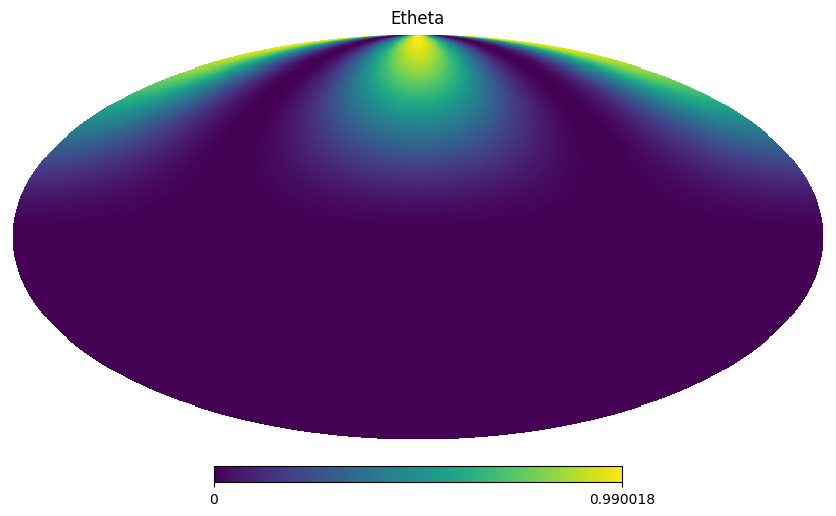

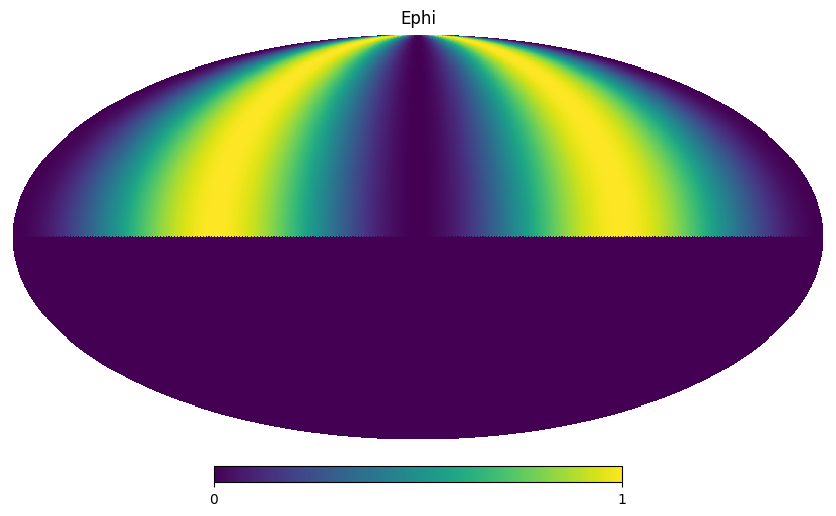

In [2]:
FREQ = 30  # MHz
NSIDE = 128

beam = fd.ShortDipole(NSIDE, frequency=FREQ)
hp.mollview(beam.beam_X[0]**2, title="Etheta")
plt.show()
hp.mollview(beam.beam_X[1]**2, title="Ephi")
plt.show()

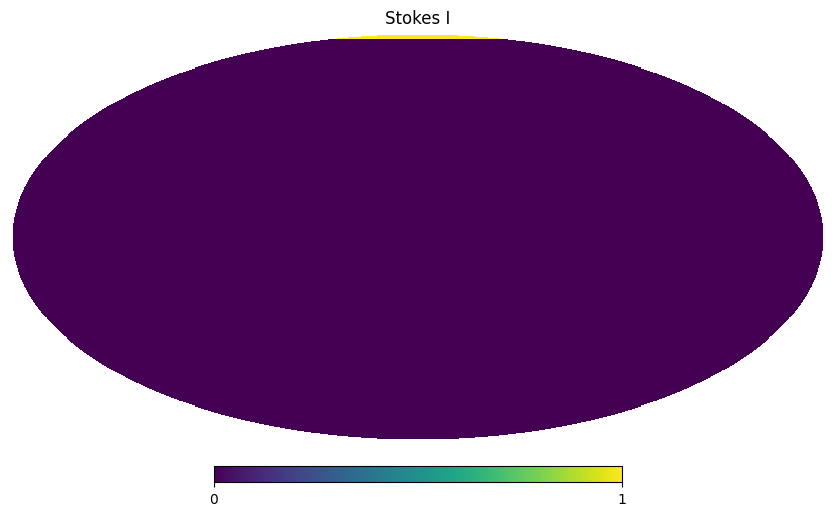

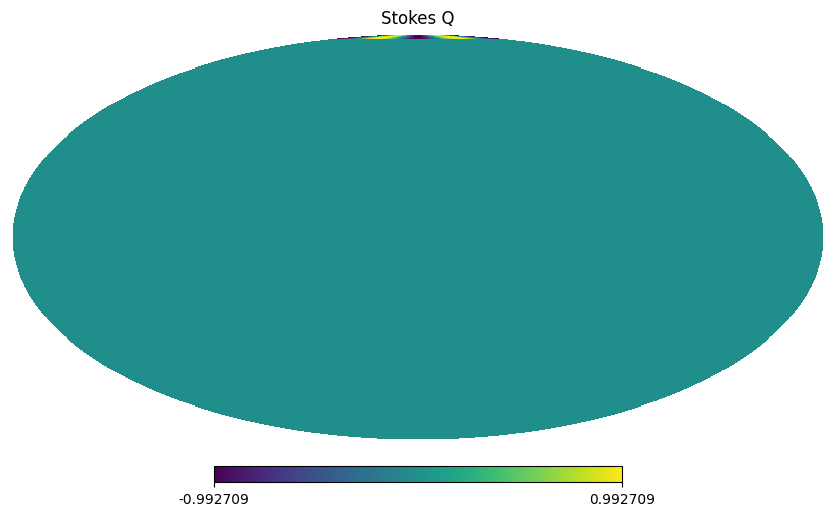

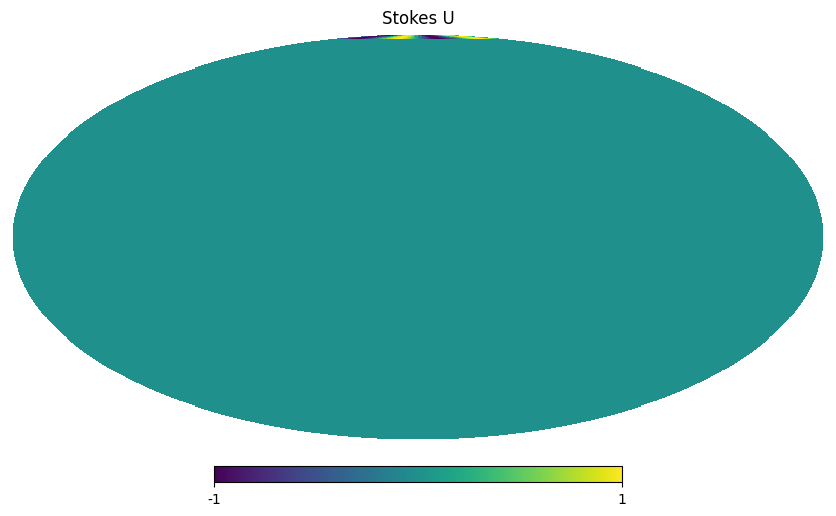

In [3]:
sky = fd.Sky.zeros(NSIDE, freq=FREQ)
sky.add_point_source(extent=5)  # 5 deg source at zenith
hp.mollview(sky.stokes[0, 0], title="Stokes I")
plt.show()
hp.mollview(sky.stokes[0, 1], title="Stokes Q")
plt.show()
hp.mollview(sky.stokes[0, 2], title="Stokes U")
plt.show()

In [4]:
print(sky.stokes.shape)
pix = sky.del_dark_pixels()  # pixels to keep
beam.del_pix(pix)
print(sky.stokes[..., sky.bright_pixels].shape)
frequencies = np.linspace(0, 0.25*64, 10000) + FREQ  # 64 channels of width 0.25 MHz = 250 kHz
sky.power_law(frequencies, -2.5)
print(sky.stokes.shape)

(1, 3, 196608)
(1, 3, 364)
(10000, 3, 364)


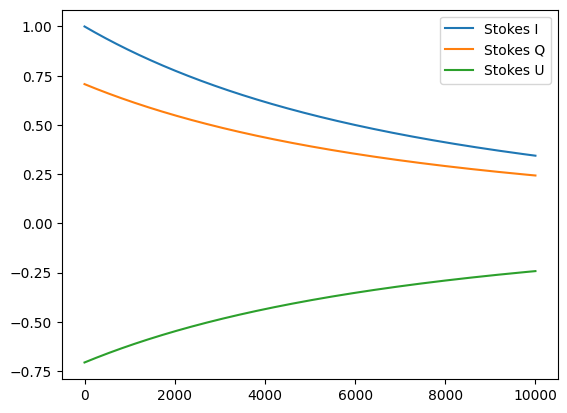

In [5]:
plt.figure()
plt.plot(sky.stokes[:, 0, 10], label="Stokes I")
plt.plot(sky.stokes[:, 1, 10], label="Stokes Q")
plt.plot(sky.stokes[:, 2, 10], label="Stokes U")
plt.legend()
plt.show()

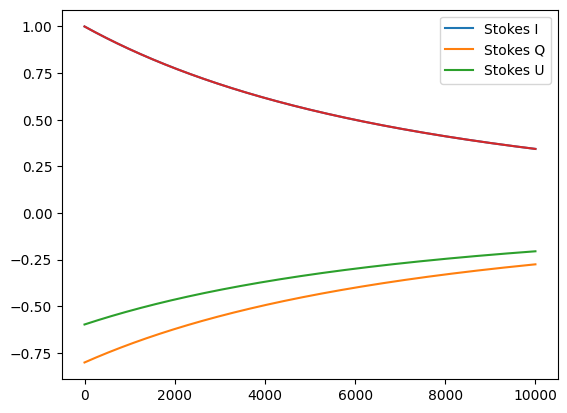

In [6]:
RM = 250
sky.apply_faraday(250)

plt.figure()
plt.plot(sky.stokes_rot[:, 0, 10], label="Stokes I")
plt.plot(sky.stokes_rot[:, 1, 10], label="Stokes Q")
plt.plot(sky.stokes_rot[:, 2, 10], label="Stokes U")
plt.plot(np.sqrt(sky.stokes_rot[:, 1, 10]**2 + sky.stokes_rot[:, 2, 10]**2))
plt.legend()
plt.show()

In [7]:
sim = fd.Simulator(beam, sky)
sim.run()

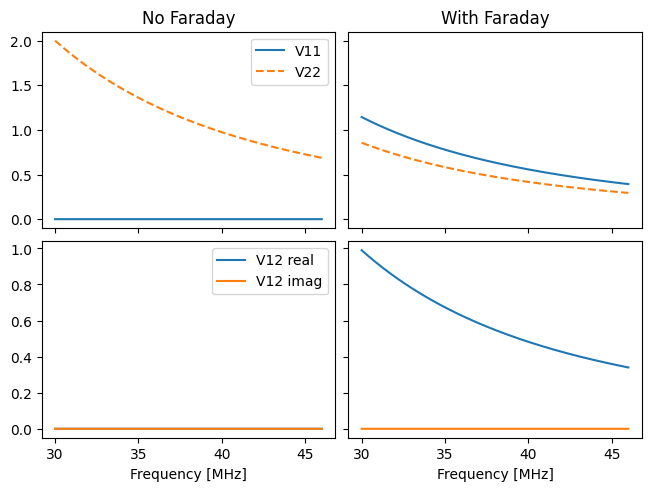

In [8]:
fd.sim.plot_vis(frequencies, sim.vis, sim.vis_rot)

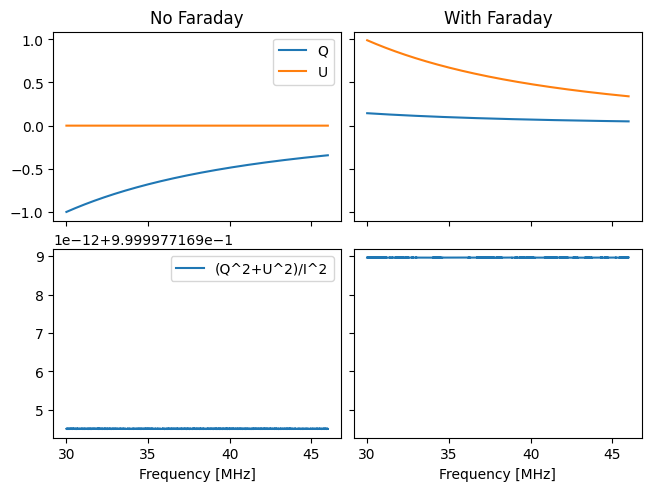

In [9]:
fd.sim.plot_stokes(frequencies, sim.stokes, sim.stokes_rot)